# LdaOverTime's Tutorial

## Introduction

In this tutorial, we are exploring the basics of how to make a basic cleanning 
of our data and how to run the LdaOverTime tutorial.

For even further information, you can check our API documentation.

## Dataset

For this tutorial, we will be using the following [dataset](https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles).

## Importing

Firstly, we are importing the main component of our library and then we are importing the model TemporalLdaModel.

The LdaOverTime is where you should interact with , it has all the values and methods that you will need, like
the functionality of ploting the graph, show the results inside PyLdaVis and also to get the results in a 
table.

TemporalLdaModel is the simplest and also the fastest of our models. It consists of a single LDA training
followed by a simple mathematical calculation, in this model you can choose either to calculate the average of
each topic's weight or the proportion of main topics. One limitation of this model is that the words that
describe each topic don't vary over time and this is the main limitation of this model.

Another alternative model is LdaSeqModel, it is basically a wrapper of Gensim's and one advantage over
TemporalLdaModel is that it tracks the changes the topic's vocabulary over time, making it mode accurate. One disavantage is that it is slower. You can try exchanging the PrevalenceModel with it.

In [1]:
from lda_over_time.lda_over_time import LdaOverTime
from lda_over_time.models.temporal_lda_model import TemporalLdaModel

/home/oozaku/.local/share/hatch/env/virtual/lda-over-time-vJj5Sxd8/lda-over-time/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/oozaku/.local/share/hatch/env/virtual/lda-over-time-vJj5Sxd8/lda-over-time/lib/python3.10/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


## Loading dataset

Because this dataset seems to be encoded with latin-1, we are setting manually the 
encoding in Pandas' function.

In [2]:
import pandas as pd

In [3]:
articles_path = "../environment-testing/Articles.csv"

data = pd.read_csv(
    articles_path, 
    usecols=["Date", "Article"], 
    encoding="latin-1"
)

## Preprocessing

LdaOverTime does not have a module to filter or to clean your texts, so you will have to clear you dataset's
texts by yourselve. Luckily, there are good libraries that can help you, we will be using the 
spaCy [1].

[1] Honnibal, M., Montani, I., Van Landeghem, S., & Boyd, A. (2020). spaCy: Industrial-strength Natural Language Processing in Python. https://doi.org/10.5281/zenodo.1212303

### Installing library and English module

Uncomment to install!

In [4]:
# install libraries
#! pip install spacy

In [5]:
# install spaCy's English module
#! python -m spacy download en_core_web_sm

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

### Cleanning each text

For this example, we are considering that only nouns, adjectives, adverbs and verbs carry relevant meaning
for our analysis.

Another aspect is that we are using lemmatization to improve the final result. In brief, lemmatization
transform the word to its basic form, e.g. "be", "been", "was" and "were" will all become "be".

In [7]:
filters = {
    "ADJ": "adjective",
    "ADV": "adverb",
    "NOUN": "noun",
    "PROPN": "proper noun",
    "VERB": "verb",
}

In [8]:
articles = data['Article']

In [9]:
# it stores the clean articles
clean_articles = []

# clear each article
for article in articles:
    
    # words that belongs to one of the chosen part of speeches
    clean = []
    
    # filter and store all words from the chosen part of speech in their basic form
    for word in nlp(article):
        if word.pos_ in filters:
            clean.append(word.lemma_)
            
    # append cleanned text
    clean_articles.append(' '.join(clean))

## Choosing a model and trainning it

To run LdaOverTime, we instantiate the chosen model, in this example TemporalLdaModel, and then we give this 
new object to our main library component LdaOverTime. 

We also set to calculate the average of topic's weights instead of the proportion of main topics. You can
compare the following results with the proportion of main topics by changing: `aggregator = "main"`.

### Instantiate chosen model

In this example, we want to find 5 topics over the dataset and each timeslice has a length of one semester. 
Moreover, we found that the date format is MM/DD/YYYY:

In [10]:
model = TemporalLdaModel(
    corpus = clean_articles,         # list texts to be analysed
    dates = data["Date"].values,     # dates of each article
    date_format = "%m/%d/%Y",        # date format is MM/DD/YYYY
    freq = "6M",                     # frequency of one semester
    n_topics = 5,                    # we want to get 5 topics
    aggregator = "average"           # calculate average of topics
)

### Call main component and train model

Finally we can call our main component, LdaOverTime, and easily train our model.

In [11]:
main = LdaOverTime(model)

## Getting results

After trainning the model, we can get the topic's words, plot the graph with 
the topics' evolution over time and also get this evolution in a table to
even further analysis.

### Get topic words

Right bellow, we are printing the top 10 words for each topic, identified by numbers 1 to 5.
From the words found, we can infer that the topics are: 

1. Trade
2. World
3. Sports
4. Business
5. Politics

In [12]:
for topic_id in range(1, 6):
    print(
        main.get_topic_words(
            topic_id=topic_id,  # select which topic we want
            timeslice=1,        # get the oldest time slice found in our trainning
            n=10                # we want the top 10 words for each topic
        )
    )

['percent', 'say', 'market', 'year', 'dollar', 'price', 'US', 'rise', 'rate', 'low']
['say', 'Pakistan', 'country', 'year', 'also', 'government', 'project', 'China', 'new', 'Minister']
['say', 'first', 'test', 'match', 'win', 'England', 'play', 'team', 'have', 'year']
['say', 'price', 'year', 'increase', 'export', 'strong', 'month', 'product', 'oil', 'company']
['oil', 'say', 'crude', 'price', 'barrel', 'OPEC', 'production', 'market', 'output', 'US']


### Plot



Bellow, we are plotting the result, the first is set to plot a simple `line` plot and the latter is set to plot in `stack`.

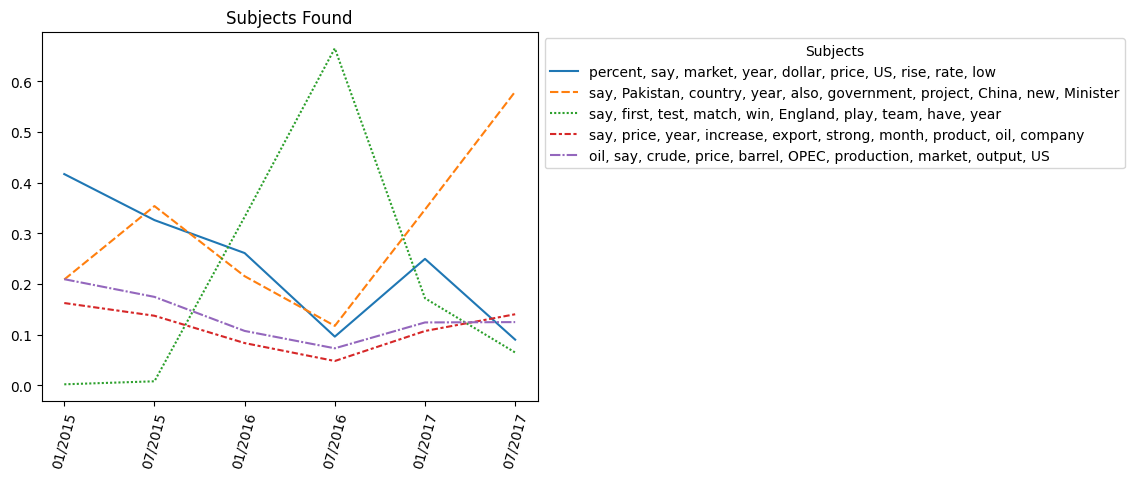

In [13]:
main.plot(
    title = 'Subjects Found',    # Plot's title
    
    legend_title="Subjects",     # Legend's title
    
    # path_to_save="./plot_of_news.png",   # Set location to save
    
    display=True,                # Display graph (default)
    
    rotation=75,                 # Rotate labels in 75º
    
    mode="line",                 # Plot lines (default)
    
    date_format="%m/%Y",         # Set custom date format to MM/YYYY
)

For the next plot, we are renaming the topics' names with the method `rename_topics`.

In [14]:
main.rename_topics(
    [
        "Economics",
        "World", 
        "Sports", 
        "Business", 
        "Politics"
    ],
    
)

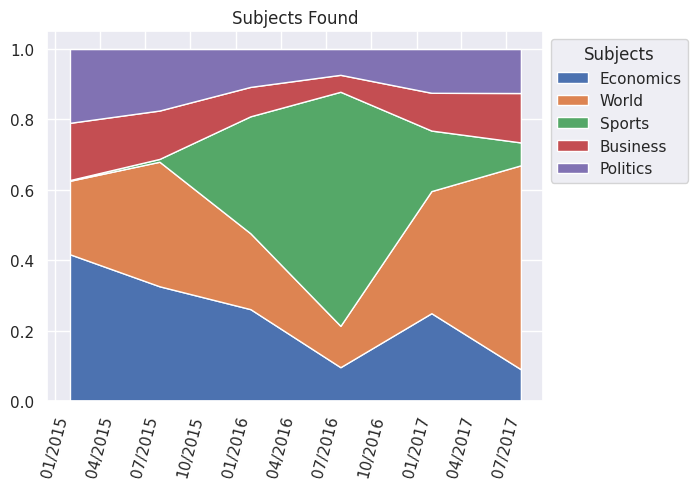

In [16]:
main.plot(
    title = 'Subjects Found',    # Plot's title
    
    legend_title="Subjects",     # Legend's title
    
    # path_to_save="./plot_of_news.png",   # Set location to save
    
    display=True,                # Display graph (default)
    
    rotation=75,                 # Rotate labels in 75º
    
    mode="stack",                # Plot stacks
    
    date_format="%m/%Y",         # Set custom date format to MM/YYYY
)
    

### Get table

Finally, we extract the table with the results for further analysis
and we also saw above how to extract each topic's top-n words.

In [ ]:
main.get_results()

## Save your work

We can save our current work with `save` and continue our last work with `load`: 

In [17]:
main.save('./my_work')

In [18]:
loaded = LdaOverTime.load('./my_work')

In [19]:
loaded.get_results()

,date,1,2,3,4,5
0,2015-01-31,0.416895,0.208933,0.002140,0.162500,0.209531
1,2015-07-31,0.326096,0.353782,0.008094,0.137395,0.174634
2,2016-01-31,0.261101,0.215476,0.332432,0.083524,0.107467
3,2016-07-31,0.096223,0.117418,0.665033,0.048135,0.073192
4,2017-01-31,0.249624,0.346895,0.171939,0.107333,0.124209
5,2017-07-31,0.090256,0.579612,0.064883,0.140366,0.124883


## PyLdaVis

One last functionality is the possibility to use 
[pyLdaVis](https://github.com/bmabey/pyLDAvis) 
to show how good is our model for different time slices.

In this example, we will show how our model behaves 
at the first time slice:

In [ ]:
graph = main.showvis(1)

In [21]:
graph

We can see from above that our model is not ideal in the first slice, since
the two most important topics are overlaping with each other.

To learn more about pyLdaVis, check out 
[their page](https://github.com/bmabey/pyLDAvis).

## Conclusion

With this tutorial, you could see the basics of how to clear the text and how
to run a basic model of topic modeling over time. As a sugestion, you can try 
to run other datasets or even try to run another model (for now we have Gensim's 
wrapper, LdaSeqModel).